# EDA and Feature Engineering/Selectin

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from datetime import datetime

### Slice Dataset to Desired Data Range

In [8]:
# accidents = pd.read_csv('data/chi_traffic_accidents.csv')

# start_date = datetime(2017, 9, 1)
# end_date = datetime(2020, 3, 1)
# accidents['crash_date'] = pd.to_datetime(accidents['CRASH_DATE'])
# accidents = accidents[(start_date <= accidents['crash_date']) & (accidents['crash_date'] < end_date)].copy()

# accidents.to_csv('data/chi_traffic_accidents_sub.csv')

### Import Revised Dataset

In [14]:
accidents = pd.read_csv('data/chi_traffic_accidents_sub.csv', parse_dates=['crash_date'])

In [15]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293075 entries, 0 to 293074
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     293075 non-null  int64         
 1   CRASH_RECORD_ID                293075 non-null  object        
 2   RD_NO                          293075 non-null  object        
 3   CRASH_DATE_EST_I               20235 non-null   object        
 4   CRASH_DATE                     293075 non-null  object        
 5   POSTED_SPEED_LIMIT             293075 non-null  int64         
 6   TRAFFIC_CONTROL_DEVICE         293075 non-null  object        
 7   DEVICE_CONDITION               293075 non-null  object        
 8   WEATHER_CONDITION              293075 non-null  object        
 9   LIGHTING_CONDITION             293075 non-null  object        
 10  FIRST_CRASH_TYPE               293075 non-null  object        
 11  

## UDF

In [43]:
def plot_null_val_heatmap(df, plot_title, figsize):
    '''
    Identifies null values within a dataframe.
    
    Args:
        df (dataframe) : Dataset to evaluate null values.
        plot_title(str) : Title of heatmap.
        figsize (tuple) : Plot dimensions
    
    Return:
        None
    
    '''
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    ax.set_title(plot_title, fontsize=20)
    fig.tight_layout();

def time_of_day(hour):
    '''
    Returns the time period, e.g. morning, based on hour of the day.
    
    '''
    if hour >= 5 and hour < 10:
        time_period = 'morning'
    elif hour >=10 and hour < 18:
        time_period = 'day'
    elif hour >=18 and hour < 21:
        time_period = 'evening'
    else:
        time_period = 'night'
    
    return time_period

def display_bar_plot(data, x, title, figsize=(6,4), hue=None):
    '''
    Displays a vertial bar plot.
    '''
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data,x=x, hue=hue,  ax=ax)
    ax.set_title(title, fontsize=16)
    fig.tight_layout();

def plot_density_distribution_by_class(df, class_col, feature_name, figsize, title):
    '''
    Generates a density distribution plot by class for the selected feature.
    '''
    fatal_arr = df[df[class_col] == 1][feature_name].values
    not_fatal_arr = df[df[class_col] == 0][feature_name].values


    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.kdeplot(fatal_arr, shade=True, color="b",  label = 'Fatal / Incapacitated')
    ax = sns.kdeplot(not_fatal_arr, shade=True, color="r", label = 'Not Severe')
    ax.legend()
    ax.set_title(title, fontsize=18)
    fig.tight_layout();

### Feature Engineering

In [16]:
accidents['crash_year'] = accidents['crash_date'].dt.year
accidents['crash_month'] = accidents['crash_date'].dt.month
accidents['is_fatal'] = np.where(accidents['MOST_SEVERE_INJURY'] == 'FATAL', 1, 0)
accidents['is_incap'] = np.where(accidents['MOST_SEVERE_INJURY'] == 'INCAPACITATING INJURY', 1, 0)
accidents['is_fatal_or_incap'] = accidents['is_fatal'] + accidents['is_incap']



In [21]:
# Removed columsn because data is administrative or describes the resulting injuries.
cols_to_drop = ['CRASH_DATE_EST_I', 'CRASH_RECORD_ID', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'Unnamed: 0',
               'CRASH_RECORD_ID', 'is_fatal', 'is_incap', 'CRASH_MONTH', 'INJURIES_REPORTED_NOT_EVIDENT', 'DAMAGE', 'REPORT_TYPE',
               'DATE_POLICE_NOTIFIED', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_FATAL', 'INJURIES_TOTAL', 'INJURIES_INCAPACITATING',
               'INJURIES_NON_INCAPACITATING', 'INJURIES_NO_INDICATION']

accidents.drop(cols_to_drop, axis=1, inplace=True)

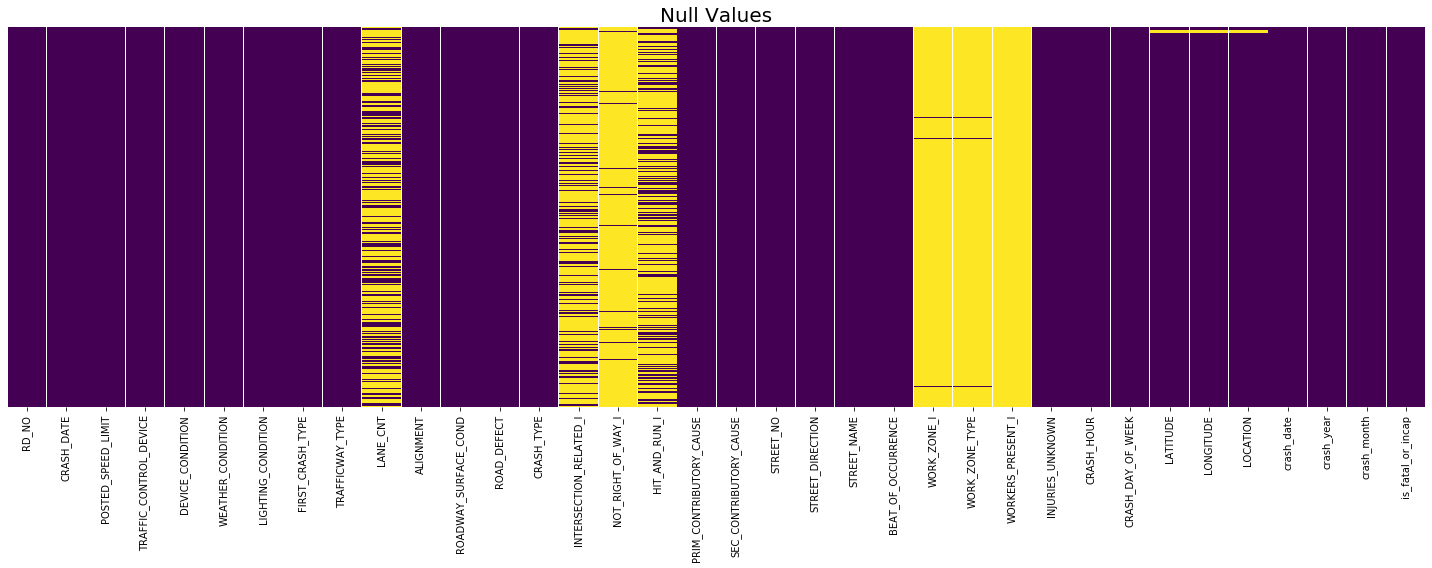

In [22]:
plot_null_val_heatmap(accidents, "Null Values", figsize=(20,8))

In [31]:
accidents['time_of_day'] = accidents['CRASH_HOUR'].apply(lambda x: time_of_day(x))

---
## EDA

Percent Resulting in Fatality or Incapacitation: 1.879%




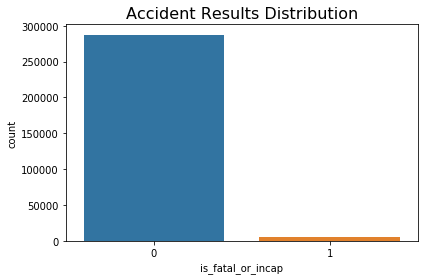

In [38]:
display_bar_plot(accidents, 'is_fatal_or_incap', 'Accident Results Distribution')

print('Percent Resulting in Fatality or Incapacitation: {0:.3%}'.format(sum(accidents['is_fatal_or_incap']) / len(accidents['is_fatal_or_incap'])))
print('\n')

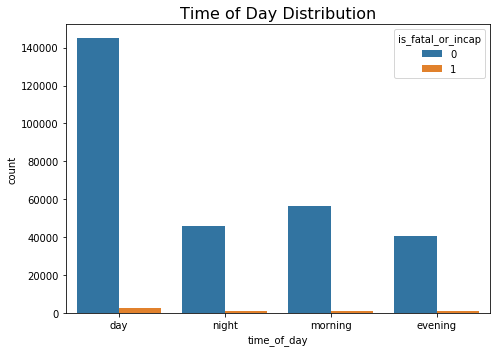

In [39]:
display_bar_plot(accidents, 'time_of_day', 'Time of Day Distribution', figsize=(7,5), hue='is_fatal_or_incap')

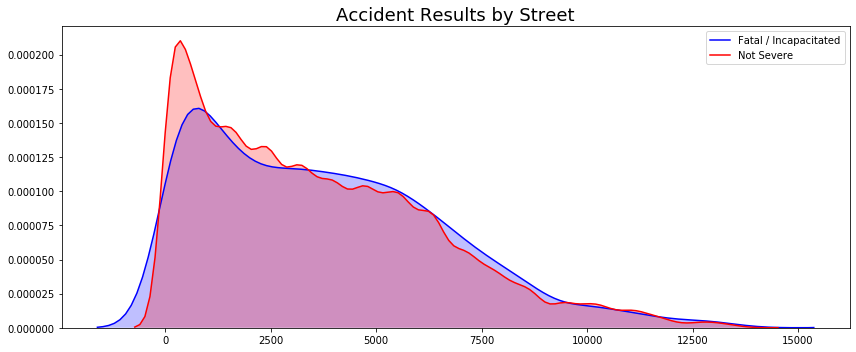

In [45]:
plot_density_distribution_by_class(accidents, 'is_fatal_or_incap', 'STREET_NO', (12,5), 'Accident Results by Street')

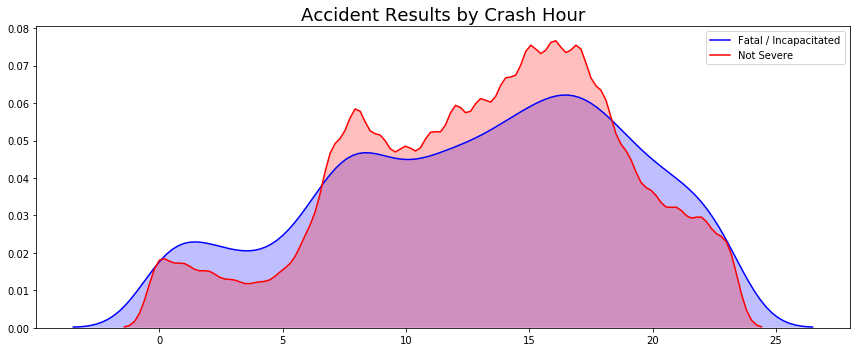

In [46]:
plot_density_distribution_by_class(accidents, 'is_fatal_or_incap', 'CRASH_HOUR', (12,5), 'Accident Results by Crash Hour')

In [ ]:
plot_density_distribution_by_class(accidents, 'is_fatal_or_incap', 'DAY_OF_WEEK', (12,5), 'Accident Results by Crash Hour')